# Incomplete, Positive-Only Label

### Part (a)

\begin{align*}
    p(y^{(i)} &= 1 \ \vert \ x^{(i)}) = p(y^{(i)} = 1, t^{(i)} = 1 \ \vert x^{(i)}) \ + p(y^{(i)} = 1, t^{(i)} = 1 \ \vert \ x^{(i)}) \\
    &= p(y^{(i)} = 1, t^{(i)} = 1 \ \vert \ x^{(i)}) \\
    &= p(y^{(i)} \ \vert \ t^{(i)} = 1) p(t^{(i)} = 1 \ \vert \ x^{(i)}) \\
    &= \alpha \ p(t^{(i)} = 1 \ \vert \ x^{(i)})
\end{align*}

### Part (b)

\begin{align*}
    \mathcal{h} (x^{(i)}) &\approx p(y^{(i)} = 1 \ \vert \ x^{(i)}) \\
    &\approx \alpha \ p(t^{(i)} = 1 \ \vert \ x^{(i)}) \\
    &\approx \alpha
\end{align*}

### Part (c)

In [1]:
import numpy as np
import src.util as util
from src.p01b_logreg import LogisticRegression

In [2]:
ds3_train_path = 'data/ds3_train.csv'
ds3_valid_path = 'data/ds3_valid.csv'
ds3_test_path = 'data/ds3_test.csv'

In [3]:
x_train, t_train = util.load_dataset(ds3_train_path, label_col='t', add_intercept= True)

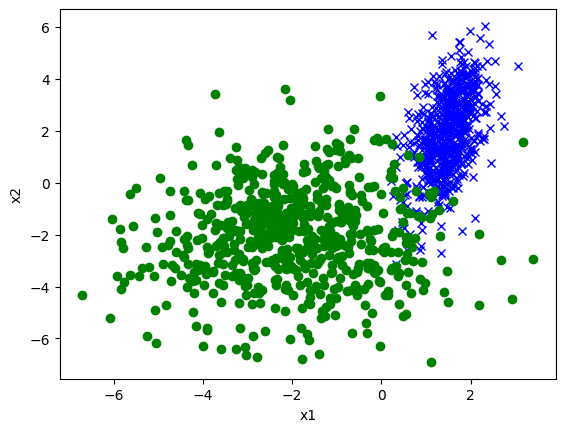

In [4]:
util.plot_dataset(x_train, t_train)

In [5]:
log_model = LogisticRegression()
log_model.fit(x_train, t_train)

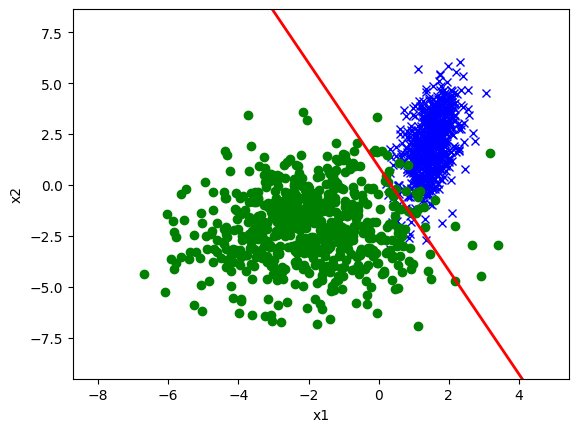

In [6]:
util.plot(x_train, t_train, log_model.theta)

## Part (d)

In [7]:
_, y_train = util.load_dataset(ds3_train_path)

In [8]:
log_model_no_true_label = LogisticRegression()
log_model_no_true_label.fit(x_train, y_train)

Theta: [-2.91607454  0.78596651  0.09282768]


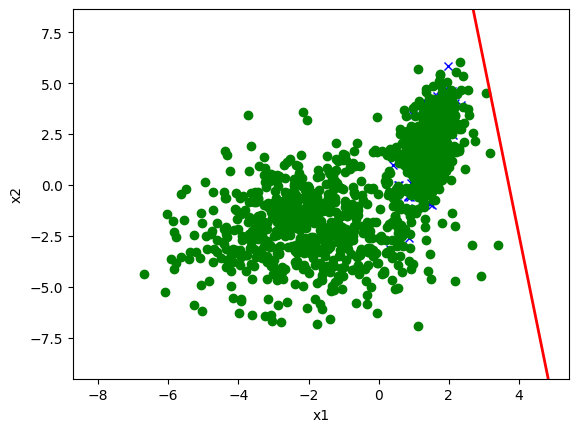

In [9]:
util.plot(x_train, y_train, log_model_no_true_label.theta)
print(f"Theta: {log_model_no_true_label.theta}")

### Part (e)

In [10]:
x_valid, y_valid = util.load_dataset(ds3_valid_path, label_col='y', add_intercept=True)
_, t_train = util.load_dataset(ds3_valid_path, label_col='t', add_intercept=True)

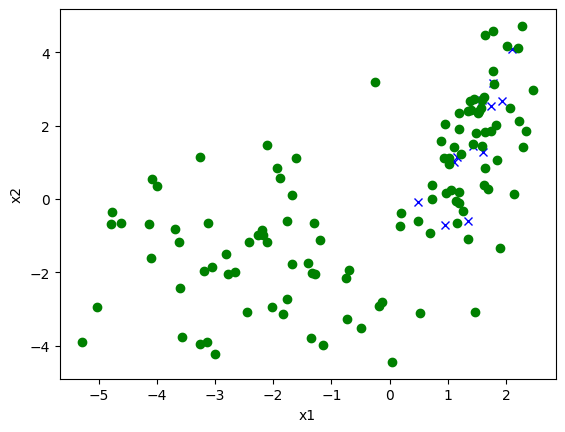

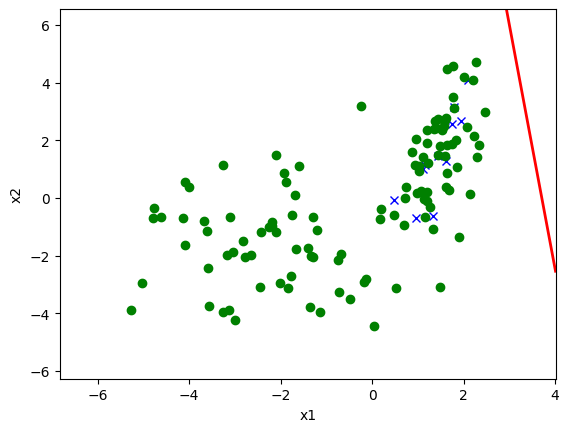

In [11]:
util.plot_dataset(x_valid, y_valid)
util.plot(x_valid, y_valid, log_model_no_true_label.theta)

#### Approximate $\alpha$

In [12]:
def sigmoid(theta, x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

In [13]:
alpha = np.mean(sigmoid(log_model_no_true_label.theta, x_valid[y_valid == 1]))

In [14]:
log_model_no_true_label.theta[0] = log_model_no_true_label.theta[0] + np.log(2 / alpha - 1)

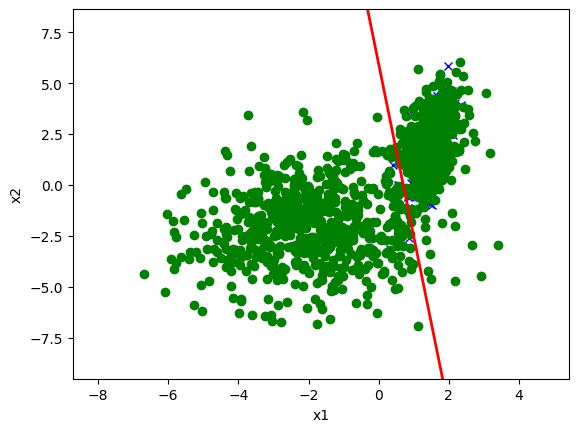

In [15]:
util.plot(x_train, y_train, log_model_no_true_label.theta)